<a href="https://colab.research.google.com/github/jafcn09/IA_1/blob/main/Pr%C3%A1ctica1_JhafetC%C3%A1nepa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRÁCTICA CALIFICA 1 - AGENTES INTELIGENTES **

> INTEGRANTE

1.   Jhafet Cánepa Maceda (2113806)



1. Conjunto de datos y métricas para la clasificación

In [ ]:
from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
diabetes = datasets.load_diabetes()

2. Datos de entrenamientos

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes




In [ ]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [ ]:
#declarando la variable para el testing
test_size = 0.2

# Dividir los datos en entrenamiento y prueba con stratify
X_diabetes, X_test, X_diabetes, y_diabetes = train_test_split(X, y, test_size=test_size,  random_state=0)




In [ ]:
X_diabetes

array([ 85., 137.,  53.,  51., 197., 135.,  72., 208., 237., 145., 110.,
       292.,  97., 197., 158., 163.,  63., 192., 233.,  68., 160., 178.,
        68., 109.,  94., 118., 275., 275., 127., 281.,  71.,  42.,  71.,
       128., 272., 135.,  51., 220., 167.,  78., 131., 212., 182., 174.,
       259.,  77.,  91., 310.,  84., 134., 102., 128., 306., 245., 201.,
       183., 111.,  96., 125., 182., 177.,  48.,  97., 259., 288., 242.,
        69.,  31., 154., 150.,  52., 261., 118., 102., 139.,  51.,  58.,
       144., 178.,  97.,  78., 129., 258., 124., 198., 185.,  66., 237.,
       178., 275., 268., 242., 200., 214., 246., 236.,  85., 114.,  93.,
        99.,  72., 270., 111.,  83.,  87.,  42., 172.,  65., 259., 279.,
       141., 144., 220.,  90., 101.,  53.,  67.,  72., 121., 303., 232.,
       140., 190., 221.,  71., 116., 111., 280., 233.,  78., 150., 283.,
        64., 140.,  65., 225., 206.,  63., 296., 173.,  85., 141.,  50.,
        25., 153.,  55., 139., 336.,  73.,  95., 10

In [ ]:
X_diabetes.shape

(353,)

In [ ]:
X_diabetes.shape

(353,)

In [ ]:
X_diabetes

array([ 85., 137.,  53.,  51., 197., 135.,  72., 208., 237., 145., 110.,
       292.,  97., 197., 158., 163.,  63., 192., 233.,  68., 160., 178.,
        68., 109.,  94., 118., 275., 275., 127., 281.,  71.,  42.,  71.,
       128., 272., 135.,  51., 220., 167.,  78., 131., 212., 182., 174.,
       259.,  77.,  91., 310.,  84., 134., 102., 128., 306., 245., 201.,
       183., 111.,  96., 125., 182., 177.,  48.,  97., 259., 288., 242.,
        69.,  31., 154., 150.,  52., 261., 118., 102., 139.,  51.,  58.,
       144., 178.,  97.,  78., 129., 258., 124., 198., 185.,  66., 237.,
       178., 275., 268., 242., 200., 214., 246., 236.,  85., 114.,  93.,
        99.,  72., 270., 111.,  83.,  87.,  42., 172.,  65., 259., 279.,
       141., 144., 220.,  90., 101.,  53.,  67.,  72., 121., 303., 232.,
       140., 190., 221.,  71., 116., 111., 280., 233.,  78., 150., 283.,
        64., 140.,  65., 225., 206.,  63., 296., 173.,  85., 141.,  50.,
        25., 153.,  55., 139., 336.,  73.,  95., 10

In [ ]:
y_diabetes

array([321., 215., 127.,  64., 175., 275., 179., 232., 142.,  99., 252.,
       174., 129.,  74., 264.,  49.,  86.,  75., 101., 155., 170., 276.,
       110., 136.,  68., 128., 103.,  93., 191., 196., 217., 181., 168.,
       200., 219., 281., 151., 257.,  49., 198.,  96., 179.,  95., 198.,
       244.,  89., 214., 182.,  84., 270., 156., 138., 113., 131., 195.,
       171., 122.,  61., 230., 235.,  52., 121., 144., 107., 132., 302.,
        53., 317., 137.,  57.,  98., 170.,  88.,  90.,  67., 163., 104.,
       186., 180., 283., 141., 150.,  47., 297., 104.,  49., 103., 142.,
        59.])

In [ ]:
y_diabetes.shape

(89,)

In [ ]:
y_diabetes

array([321., 215., 127.,  64., 175., 275., 179., 232., 142.,  99., 252.,
       174., 129.,  74., 264.,  49.,  86.,  75., 101., 155., 170., 276.,
       110., 136.,  68., 128., 103.,  93., 191., 196., 217., 181., 168.,
       200., 219., 281., 151., 257.,  49., 198.,  96., 179.,  95., 198.,
       244.,  89., 214., 182.,  84., 270., 156., 138., 113., 131., 195.,
       171., 122.,  61., 230., 235.,  52., 121., 144., 107., 132., 302.,
        53., 317., 137.,  57.,  98., 170.,  88.,  90.,  67., 163., 104.,
       186., 180., 283., 141., 150.,  47., 297., 104.,  49., 103., 142.,
        59.])

In [ ]:
test_size

0.2

**3. Identificando los hiperparametros de la diabetes:**

In [ ]:
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

Comenzaremos agregando la libreria adecuada sobre la diabetes de su dataset

In [ ]:
print("Aqui vamos imprimir las variables de los datos sobre la diabetes:\n", diabetes_dataset.keys())

Aqui vamos imprimir las variables de los datos sobre la diabetes:
 dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [ ]:
print("Obteniendo los datos:", diabetes_dataset['data'])

Obteniendo los datos: [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [ ]:
print("Cual seria el objetivo obtenido:", diabetes_dataset['target'])

Cual seria el objetivo obtenido: [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Cargar el conjunto de datos de diabetes en un DataFrame de pandas
diabetes_dataset = load_diabetes(as_frame=True)

# Imprimir el DataFrame
print("se va a divir el marco de la siguiente forma:", diabetes_dataset['frame'])


Cual seria el marco:           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002

In [ ]:
from sklearn.datasets import load_diabetes

# Cargar el conjunto de datos de diabetes
diabetes_dataset = load_diabetes()

# Imprimir la descripción de los datos
print("Descripción de los datos que se obtuvieron:")
print(diabetes_dataset.DESCR)




Descripción de los datos que se obtuvieron:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      g

In [ ]:
print("Obteniendo el nombre de la funciones:\n", diabetes_dataset['feature_names'])

Obteniendo el nombre de la funciones:
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
print("Obteniendo el nombre de los datos:\n", diabetes_dataset['data_filename'])

Obteniendo el nombre de los datos:
 diabetes_data_raw.csv.gz


In [ ]:
print("Obteniendo el nombre del archivo:", diabetes_dataset['target_filename'])

Obteniendo el nombre del archivo: diabetes_target.csv.gz


 **4. Implementar validación de modelo**

4.1 Estrategia Gridsearch

4.1.2  35 trials de validación cruzada no anidada (non-nested cross-validation)

In [ ]:
non_nested_scoresG = []
nested_scoresG = []


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np


print(__doc__)

# Number of random trials
NUM_TRIALS = 35

#variables declaradas
X_diabetes = X_test
y_diabetes  = y_test



# Set up possible values of parameters to optimize over
grid_list = {"svr__C": [0.1, 10, 100, 1000],
             "svr__gamma": [0.01, 0.1, 1, 10]}

model_pipeline = Pipeline([('scaler', StandardScaler()),
                           ('svr', SVR(C= 1, kernel = 'rbf', gamma = 1))])
metric = 'neg_root_mean_squared_error'

Automatically created module for IPython interactive environment


In [ ]:

for i in range(NUM_TRIALS):

#model selección
    inner_cv = KFold(n_splits=3, shuffle=True)
    #model validacion
    outer_cv = KFold(n_splits=3, shuffle=True)

    clf = GridSearchCV(estimator=model_pipeline, param_grid=grid_list, cv=inner_cv, scoring = metric)
    clf.fit(X_diabetes, y_diabetes)

    non_nested_scoresG.append(clf.best_score_*-1)



In [ ]:
average_errorGn = np.mean(non_nested_scoresG)
std_scoreGn = np.std(non_nested_scoresG)
print("Error estimado es:", non_nested_scoresG);
print("Promedio del error:", average_errorGn)
print("Desviacion estandar:", std_scoreGn)

Error estimado es: [57.94268482659725, 58.165903097290766, 57.65346512898114, 60.754823761453906, 57.74145916017256, 57.26386106348303, 58.80859666321862, 57.439333101501575, 62.08637315900057, 57.276277100523465, 58.509356049186806, 59.520632428258835, 58.96777800064044, 60.34571119922813, 58.05665491380288, 59.35291225463798, 59.36897509116208, 60.17545904684804, 56.213725231817726, 60.04979025089949, 58.18137577390585, 62.01282627150562, 64.91221130519304, 60.05300126782232, 56.50847571488165, 59.23862787181315, 63.18386039793648, 57.51839539595255, 59.867621535302305, 58.06691314388812, 59.29198141374201, 60.51467396358486, 58.74629715363891, 58.74017052847112, 57.334038592595114]
Promedio del error: 59.13897833882681
Desviacion estandar: 1.836175908653259


** 4.1.3 35 trials Validación cruzada anidada**

In [ ]:
for i in range(NUM_TRIALS):
  #modelo seleccion
    inner_cv = KFold(n_splits=3, shuffle=True)
    #modelo validacion
    outer_cv = KFold(n_splits=3, shuffle=True)

    clf = GridSearchCV(estimator=model_pipeline, param_grid=grid_list, cv=inner_cv, scoring =metric)
    clf.fit(X_diabetes, y_diabetes)
    nested_scoreG = cross_val_score(clf, X=X_diabetes, y=y_diabetes, cv=outer_cv)
    nested_scoresG.append(nested_scoreG)



In [ ]:
average_errorG = np.mean(nested_scoresG)
std_scoreG = np.std(nested_scoresG)
print("Estimación del error esperado de generalización:", nested_scoresG)
print("Promedio del error de generalización estimado:", average_errorG)
print("Desviacion estandar:", std_scoreG)

Estimación del error esperado de generalización: [array([-69.5241046 , -51.75211048, -71.05151174]), array([-60.64205274, -63.15855404, -51.10372616]), array([-58.71035818, -58.68029996, -54.37082655]), array([-59.22241532, -57.52297168, -61.43528162]), array([-62.69720582, -52.2522823 , -56.17252221]), array([-45.94436453, -66.24378381, -63.89668623]), array([-57.07202902, -71.36860346, -62.15215322]), array([-102.44553631,  -54.39618615,  -65.07655807]), array([-63.4716102 , -57.26752864, -52.83283165]), array([-57.32473649, -62.9998299 , -55.36487917]), array([-53.22426031, -79.1215459 , -73.88387417]), array([-63.19862512, -60.27953109, -53.38015977]), array([-62.22482067, -68.66004873, -57.63125589]), array([-55.50001017, -68.33863497, -64.00961551]), array([-66.17901871, -57.90958369, -54.98341995]), array([-61.30854576, -60.5702218 , -62.56982989]), array([-46.16219421, -66.87623737, -69.60941301]), array([-66.85056996, -52.93370664, -48.52114448]), array([-48.98939812, -63.9613

**4.2.1 Estrategias de  Random Search**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
import numpy as np


print(__doc__)

# Number of random trials
NUM_TRIALS = 35

#variables declaradas
X_diabetes = X_test
y_diabetes  = y_test

Automatically created module for IPython interactive environment


**4.2.2 35 trials de validación cruzada  no anidada**

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Cargar el conjunto de datos Diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_diabetes, X_test, y_diabetes, y_test = train_test_split(X, y, test_size=0.2, random_state=35)


In [ ]:

model = RandomForestRegressor()
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50]
}



In [ ]:
# Realizar Random Search con 35 trials
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=3, cv=5, n_jobs=-1, random_state=35)
random_search.fit(X_diabetes, y_diabetes)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=35)

In [ ]:
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("\nPuntuación  de la prueba:", test_score)



Puntuación  de la prueba: 0.3272809175404098


In [ ]:

print("\nPuntuación del mejor modelo:")
print(random_search.best_score_)



Puntuación del mejor modelo:
0.4544304476145265


**4.2.3  35 trials de validación cruzada  anidada **

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Cargar el conjunto de datos Diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [ ]:
# Definir el modelo y los hiperparámetros para Random Search
model = RandomForestRegressor()
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

# Configurar la estrategia de validación cruzada anidada
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Listas para almacenar los resultados de las iteraciones
outer_scores = []
best_models = []

In [ ]:
# Realizar nested cross-validation
for train_index, test_index in outer_cv.split(X):
    X_train_outer, X_test_outer = X[train_index], X[test_index]
    y_train_outer, y_test_outer = y[train_index], y[test_index]

    # Realizar Random Search en el conjunto de entrenamiento interno
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5, cv=inner_cv, n_jobs=-1, random_state=35)
    random_search.fit(X_train_outer, y_train_outer)
# Obtener el mejor modelo
    best_model = random_search.best_estimator_
    best_models.append(best_model)

    # Evaluar el mejor modelo en el conjunto de prueba externo
    outer_score = best_model.score(X_test_outer, y_test_outer)
    outer_scores.append(outer_score)

# Calcular el rendimiento promedio
mean_score = np.mean(outer_scores)

In [ ]:

# Imprimir los resultados
print("Puntuaciones en las iteraciones", outer_scores)
print("\nRendimiento promedio:", mean_score)



Puntuaciones en las iteraciones [0.43456306020779367, 0.5297189131274944, 0.24364143901266622, 0.4731305537358188, 0.42114140966776603]

Rendimiento promedio: 0.4204390751503079


5. Graficar los resultados

**5.1 BOXPLOT**

**5.1.1 Gridsearch**

In [ ]:
print(non_nested_scoresG)

[57.94268482659725, 58.165903097290766, 57.65346512898114, 60.754823761453906, 57.74145916017256, 57.26386106348303, 58.80859666321862, 57.439333101501575, 62.08637315900057, 57.276277100523465, 58.509356049186806, 59.520632428258835, 58.96777800064044, 60.34571119922813, 58.05665491380288, 59.35291225463798, 59.36897509116208, 60.17545904684804, 56.213725231817726, 60.04979025089949, 58.18137577390585, 62.01282627150562, 64.91221130519304, 60.05300126782232, 56.50847571488165, 59.23862787181315, 63.18386039793648, 57.51839539595255, 59.867621535302305, 58.06691314388812, 59.29198141374201, 60.51467396358486, 58.74629715363891, 58.74017052847112, 57.334038592595114]


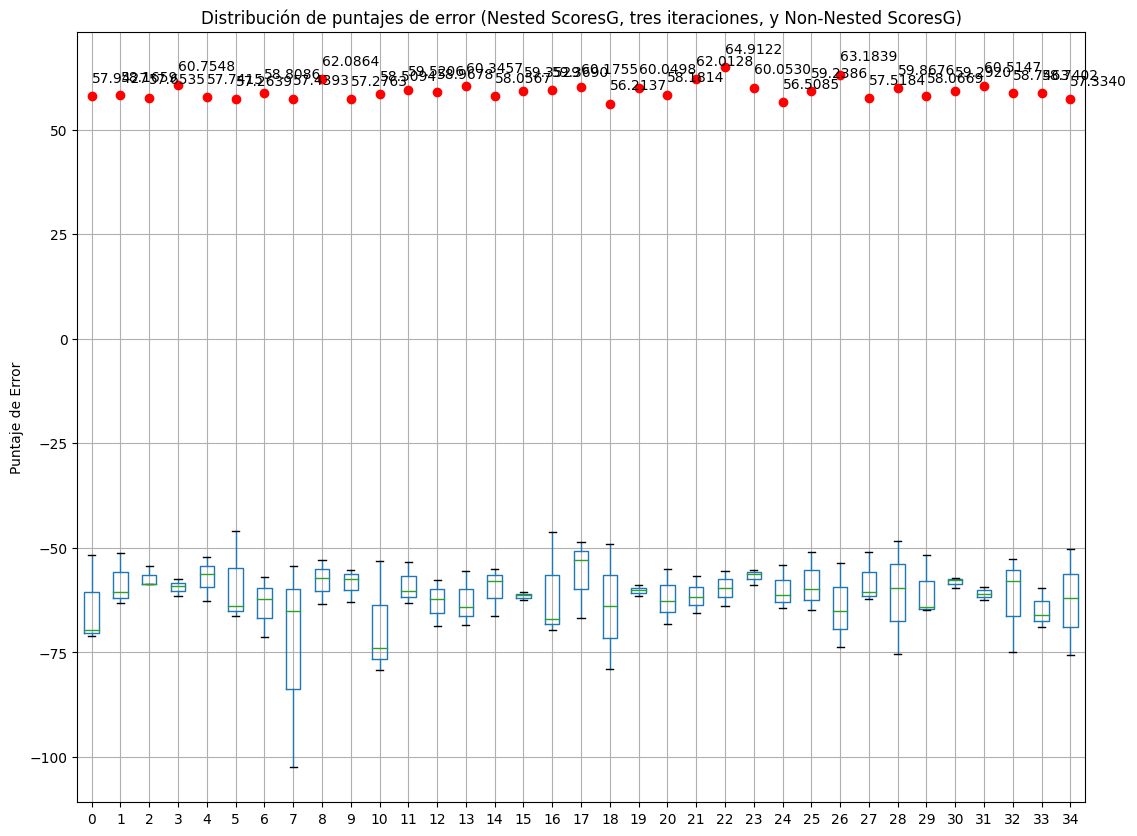

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))
#importando la libreria para el gráfico
import pandas as pd
#declarando variable
pd.DataFrame(nested_scoresG).transpose().boxplot(ax=ax)

# Agregar los valores de los puntajes de error no anidados
ax.plot(range(1, len(non_nested_scoresG) + 1), non_nested_scoresG, 'ro', markersize=6)
# Anotar los valores de los puntajes no anidados en el gráfico
for i, score in enumerate(non_nested_scoresG):
    ax.annotate(f'{score:.4f}', (i+1, score), xytext=(0, 10), textcoords='offset points')

# Ajustar las etiquetas del eje y
ax.set_ylabel('Puntaje de Error')

ax.set_title('Distribución de puntajes de error (Nested ScoresG, tres iteraciones, y Non-Nested ScoresG)')

# Mostrar el gráfico
plt.show()


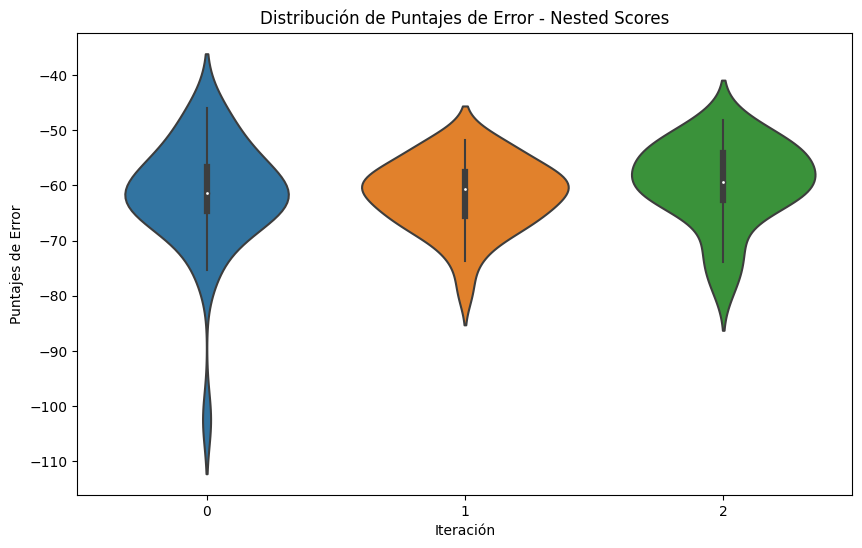

In [ ]:
df_nested_scoresG = pd.DataFrame(nested_scoresG)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_nested_scoresG)
plt.xlabel('Iteración')
plt.ylabel('Puntajes de Error')
plt.title('Distribución de Puntajes de Error - Nested Scores')
plt.show()

**5.1.2  Coarse finer search**

In [ ]:
print(outer_scores)

[0.4386931103881032, 0.5365195968348406, 0.26663119761453424, 0.4637514898156312, 0.411314784245166, 0.4405318894188863, 0.53801638766794, 0.2567945157962962, 0.4850915966332381, 0.42491018783725276, 0.43314500050277993, 0.5269708582090353, 0.2581990459334095, 0.47346552790075924, 0.43347734886234934]


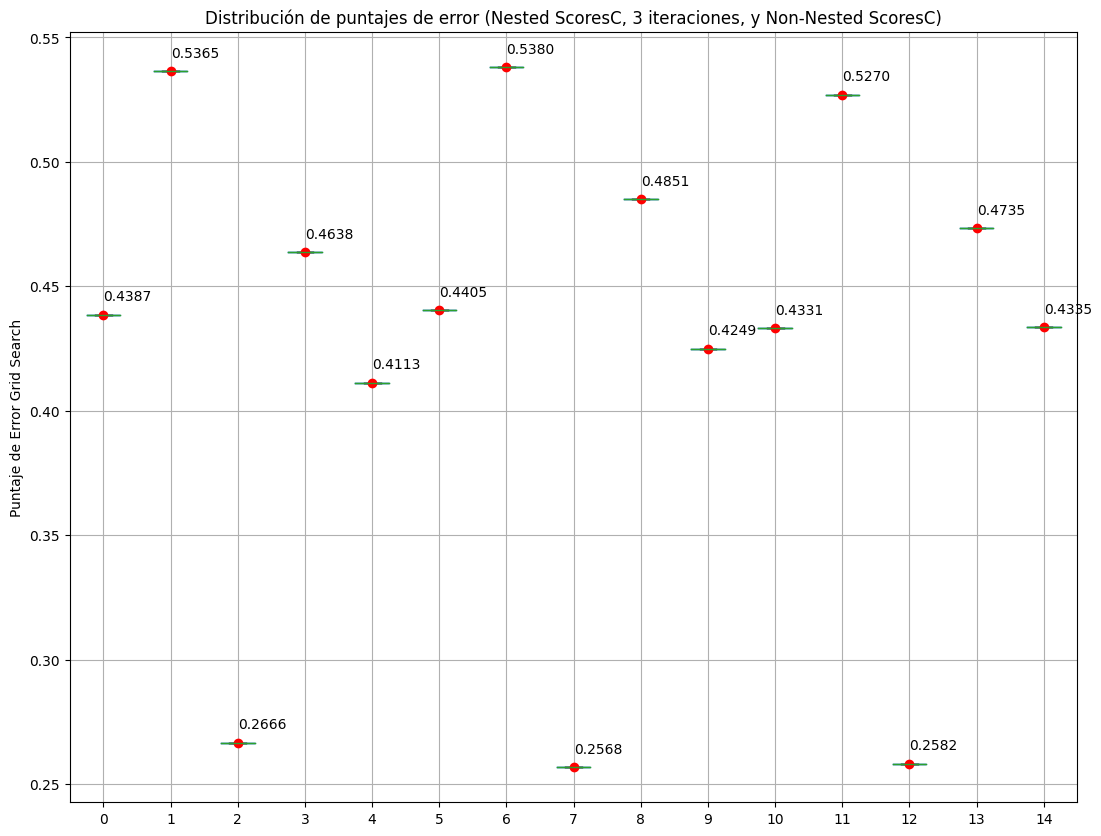

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))

# Crear el boxplot
pd.DataFrame(outer_scores).transpose().boxplot(ax=ax)

# Agregar los valores de los puntajes de error no anidados
ax.plot(range(1, len(outer_scores) + 1), outer_scores, 'ro', markersize=6)

# Anotar los valores de los puntajes no anidados en el gráfico
for i, score in enumerate(outer_scores):
    ax.annotate(f'{score:.4f}', (i+1, score), xytext=(0, 10), textcoords='offset points')

# Ajustar las etiquetas del eje y
ax.set_ylabel('Puntaje de Error Grid Search')

ax.set_title('Distribución de puntajes de error (Nested ScoresC, 3 iteraciones, y Non-Nested ScoresC)')

# Mostrar el gráfico
plt.show()

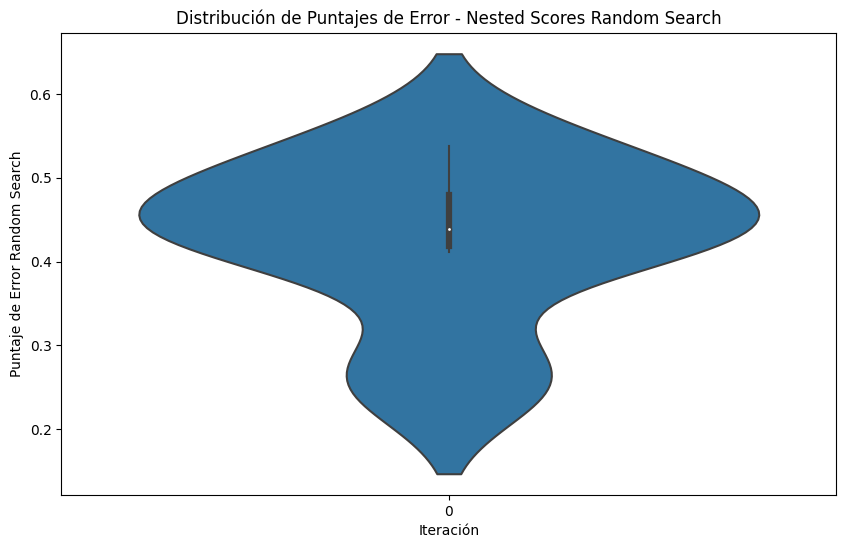

In [ ]:
# Crear un DataFrame con los datos de nested_scoresC
scores = pd.DataFrame(outer_scores)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el diagrama de violín con Seaborn
sns.violinplot(data=scores)

# Configurar etiquetas de los ejes
plt.xlabel('Iteración')
plt.ylabel('Puntaje de Error Random Search')
plt.title('Distribución de Puntajes de Error - Nested Scores Random Search')
# Mostrar el gráfico
plt.show()

**6. Estimar el error en el conjunto de Test**

**6.1 Estimar el error usando Grid Search**

In [ ]:
print("Promedio del error generado en el tiempo  estimado con Non nested y Nested con Grigsearch:", average_errorGn, average_errorG);
print("Desviacion estandar en Non nested y Nested con Grigsearch:", std_scoreGn, std_scoreG)

Promedio del error generado en el tiempo  estimado con Non nested y Nested con Grigsearch: 59.13897833882681 -60.96980001568314
Desviacion estandar en Non nested y Nested con Grigsearch: 1.836175908653259 7.995056639568742


**6.1.2 Estimar el error usando Random Search**

In [ ]:
print("Promedio del error generado en el tiempo estimado en Non nested y Nested con Randomsearch:", outer_scores, outer_scores);
print("Desviacion estandar en Non nested y Nested con Randomsearch:", outer_scores)

Promedio del error generado en el tiempo estimado en Non nested y Nested con Randomsearch: [0.43456306020779367, 0.5297189131274944, 0.24364143901266622, 0.4731305537358188, 0.42114140966776603] [0.43456306020779367, 0.5297189131274944, 0.24364143901266622, 0.4731305537358188, 0.42114140966776603]
Desviacion estandar en Non nested y Nested con Randomsearch: [0.43456306020779367, 0.5297189131274944, 0.24364143901266622, 0.4731305537358188, 0.42114140966776603]


**7.  Análisis de los resultados: Reportar una tabla con la siguiente información**

In [ ]:
print("Test Score (Accuracy) Gridsearch:", std_scoreG)
print("Test Score (Accuracy) Randomsearch:", test_score)


Test Score (Accuracy) Gridsearch: 7.995056639568742
Test Score (Accuracy) Randomsearch: 0.3272809175404098


In [ ]:
              Non-nested CV                                         Nested CV                                              Test score        Ranking basado en grafico

Grid Search   (mean/std) 59.13897833882681/ 60.96980001568314      (mean/std)  1.836175908653259  /  7.995056639568742      1.18                           2
Random Search (mean/std) 0.434563060207793672/0.5297189131274944    (mean/std) 0.43456306020779367 / 0.5297189131274944    0.9736842105263158               1
